# Detecting Fraudulent Credit Card Transactions

## Importing Libraries

In [1]:
# Data Processing
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style("whitegrid")

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

## Reading Data

In [2]:
unprocessed_data = pd.read_csv("creditcard_2023.csv")

In [3]:
unprocessed_data.shape

(568630, 31)

## Initital Data Exploration

In [5]:
unprocessed_data.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
unprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
unprocessed_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


Text(1, 250000, '284315')

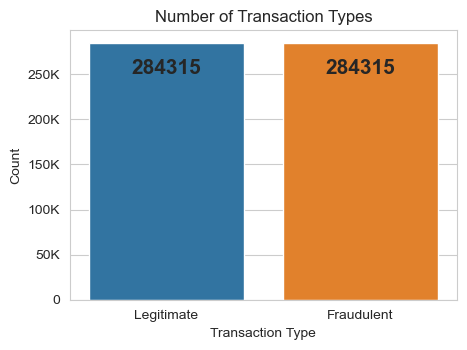

In [8]:
# Set plot dimensions
fig, ax = plt.subplots(figsize=(5, 3.5))

# Create countplot
sns.countplot(x = unprocessed_data['Class'], ax=ax)

# Set tick marks to make the plot more readable
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.yticks([0, 50000, 100000, 150000, 200000, 250000], ['0', '50K', '100K', '150K', '200K', '250K'])

# Set plot title and axes labels
ax.set_title('Number of Transaction Types')
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')

# Add text to each bar
ax.text(0, 250000, unprocessed_data['Class'].value_counts()[0], fontsize = 15, ha='center', weight='bold')
ax.text(1, 250000, unprocessed_data['Class'].value_counts()[1], fontsize = 15, ha='center', weight='bold')

In [1]:
# Create a correlation matrix between all features
corrMatrix = unprocessed_data.corr()
sns.heatmap(corrMatrix)
plt.show()

NameError: name 'unprocessed_data' is not defined

## Data Cleaning

In [11]:
# Define a method for cleaning data
def clean(df):
    return(df
           .drop(columns = ['id'])
           .loc[:, 'Class'].replace([0, 1], ['Legitimate', 'Fraudulent']))

# Call cleaning method
clean_data = clean(unprocessed_data)

## Modeling

### Model 1

In [10]:
# Split data into features (X) and target values (y)
X = clean_data.drop('Class', axis = 1)
y = clean_data['Class']

# Split again to training (80%) and testing data (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

In [11]:
# Build a random forest classifier with 100 decision trees
rf_classifier = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state= 42)

In [12]:
# Train the rf classifier on training data
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

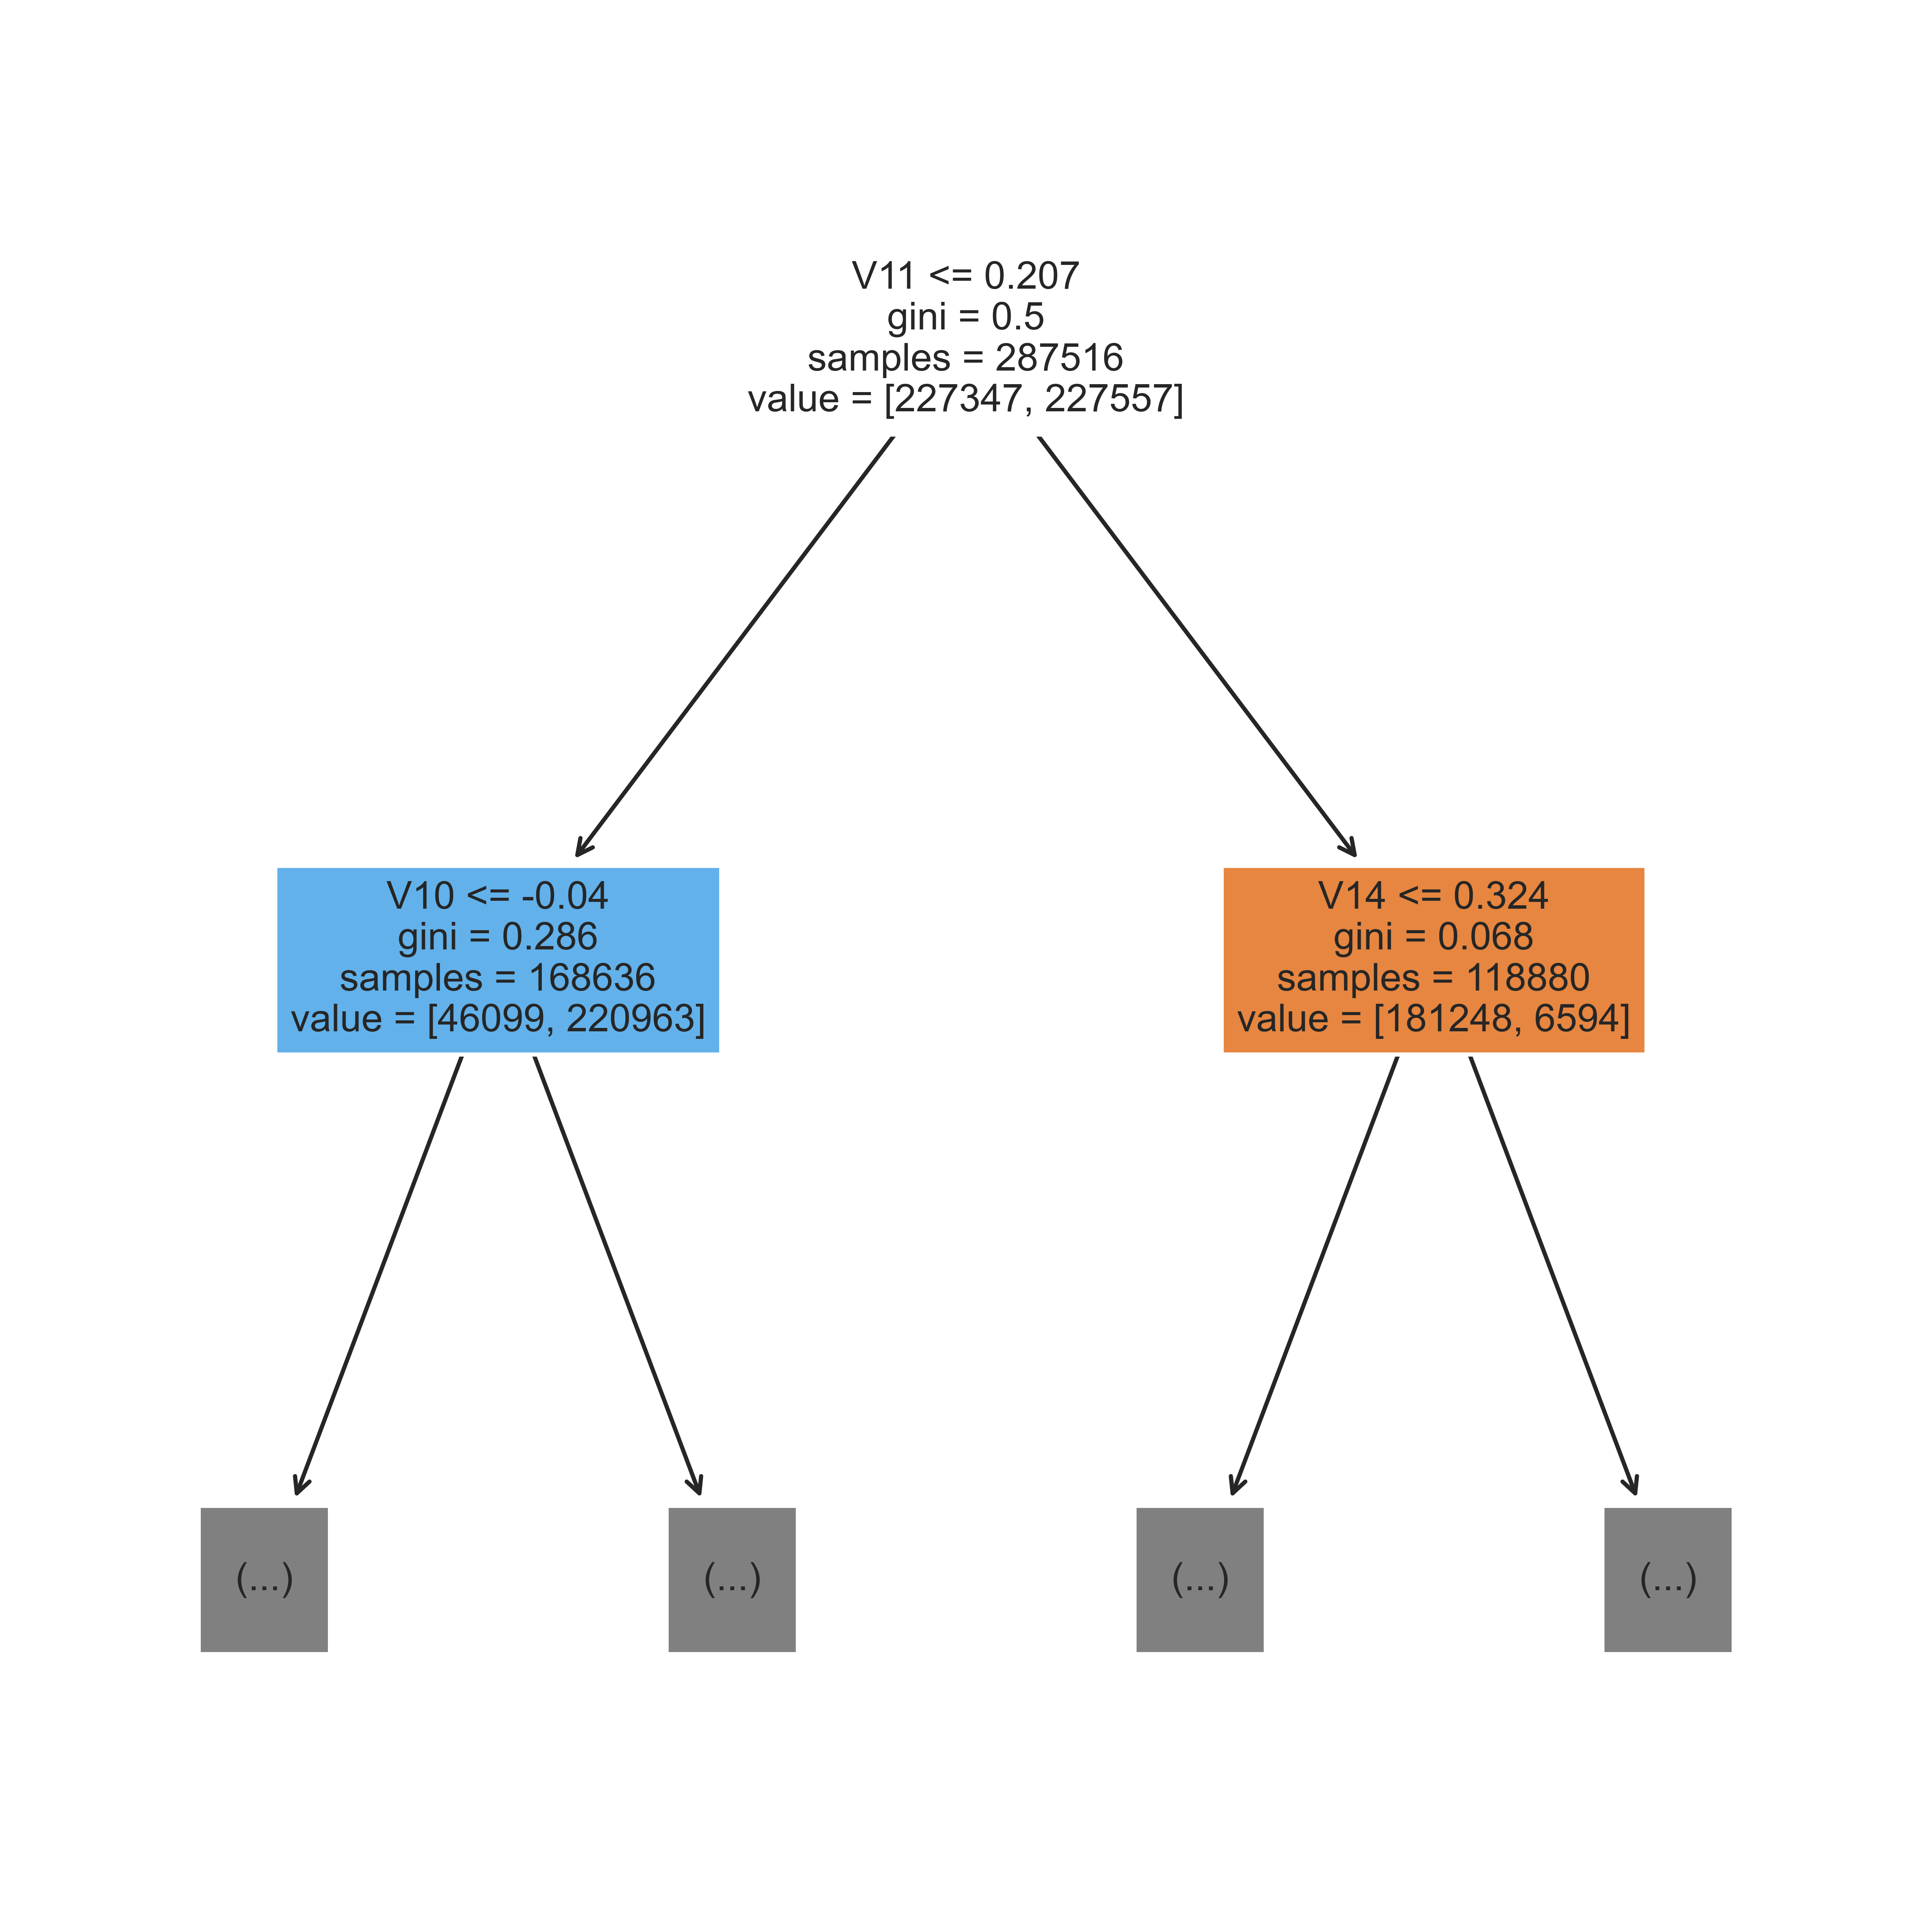

In [13]:
# Extract single tree
estimator = rf_classifier.estimators_[42]

# Create a figure and plot a single decision tree to a depth of 2
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=800)
tree.plot_tree(estimator,
               feature_names = list(clean_data.columns), 
               max_depth = 1,
               filled = True);

# Save figure as a png
fig.savefig('tree.png')

In [14]:
# Calculate accuracy score of model 1
model_1_accuracy = rf_classifier.score(X_test, y_test)
print(model_1_accuracy)

0.9998768971035648


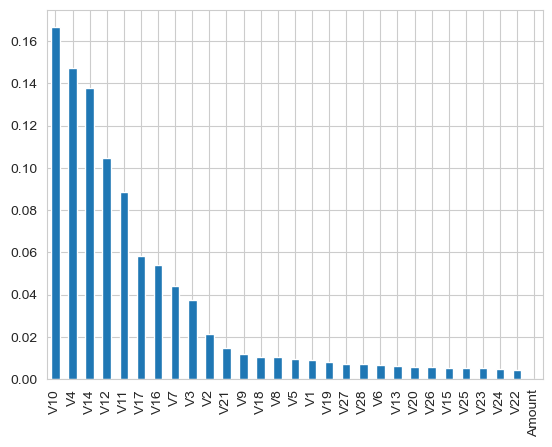

In [15]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a bar chart
feature_importances.plot.bar();

Due to the Amount feature having such little importance, I am going to remove it and retrain the model to see if that improves performance. It is possible that feature is just complicating the model unnecessarily. 

### Model 2

In [16]:
# Split data into features (X) and target values (y)
X = clean_data.drop(['Class', 'Amount'], axis = 1)
y = clean_data['Class']

# Split again to training (80%) and testing data (20%)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y, test_size = 0.2, random_state= 42)

# Build a random forest classifier with 100 decision trees
rf_classifier_2 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)

# Train the rf classifier on training data
rf_classifier_2.fit(X_train_2, y_train_2)

# Calculate accuracy score of model 2
model_2_accuracy = rf_classifier_2.score(X_test_2, y_test_2)

In [17]:
# Compare both model's accuracy to determine the best one
print("Model 1 Accuracy: " + str(round(model_1_accuracy * 100, 4)) + "%")
print("Model 2 Accuracy: " + str(round(model_2_accuracy * 100, 4)) + "%")

Model 1 Accuracy: 99.9877%
Model 2 Accuracy: 99.9859%


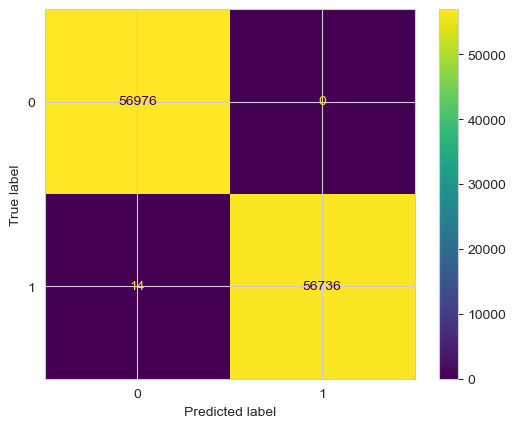

In [18]:
# Create the confusion matrix for the first model's predictions
y_pred = rf_classifier.predict(X_test)
y_true = y_test
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()

In [19]:
# Print accuracy, precision, and recall
accuracy = round(accuracy_score(y_true, y_pred) * 100, 3)
print("Accuracy Score: " + str(accuracy) + "%")

precision = round(precision_score(y_true, y_pred, average=None)[0] * 100, 3)
print("Precision Score: " + str(precision) + "%")

recall = round(recall_score(y_true, y_pred, average=None)[0] * 100, 3)
print("Recall Score: " + str(recall) + "%")

Accuracy Score: 99.988%
Precision Score: 99.975%
Recall Score: 100.0%
